The relevant Hamiltonian (Rath, equation A7) is

$$H(\phi, p, t_{rescaled}) = \frac{p^2}{2} - \epsilon_1 \cos\phi - \epsilon_2 \cos(r(\phi - \nu t_{rescaled}))$$
    
where $p$ is the conjugate momentum of $\phi$. From Hamiltonian mechanics, Hamilton's equations of motion are given by 

$$\dot q = \frac{\partial H}{\partial p} \quad \text{ and } \quad \dot p = \frac{\partial H}{\partial q}$$
    
for each coordinate $q$ and its conjugate momentum $p$. So, for this Hamiltonian, the relevant equations are
    
$$\dot \phi = \frac{\partial H}{\partial p} = p$$
    
$$\dot p = -\frac{\partial H}{\partial \phi} = -\epsilon_1 \sin\phi - \epsilon_2 r\sin(r(\phi-\nu t)).$$
    
This is the equation we want to solve, and produce a surface of section for.
    
    
Done with reference to
    
http://astro.pas.rochester.edu/~aquillen/ast233/lectures/perturbedpendulum.html

https://scipython.com/blog/the-double-pendulum/

We define a state vector $y = [\phi, p]$. Then,

$$y' = [p,- \epsilon_1 \sin \phi - \epsilon_2 r \sin(r(\phi - \nu t))]$$

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

In [22]:
def hamiltonian(y, t, eps1, eps2, r, nu):
    """The Hamiltonian of the system, in state-vector form."""
    phi, p = y
    dydt = [p, -eps1*np.sin(phi) - eps2*r*np.sin(r*(phi-nu*t))]
    return dydt

Generate a list of starting values.

https://stackoverflow.com/questions/32208359/is-there-a-multi-dimensional-version-of-arange-linspace-in-numpy

In [21]:
# Get list of initial conditions to try [from Eritas's code, since my meshgrid hated me]

y0 = [[x,y] for x in np.linspace(-np.pi/2, np.pi/2, 20) for y in np.linspace(-2, 12, 30)]


C:\Users\Lucien\AppData\Local\Temp\ipykernel_15056\2488151968.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


(-3.141592653589793, 3.141592653589793)

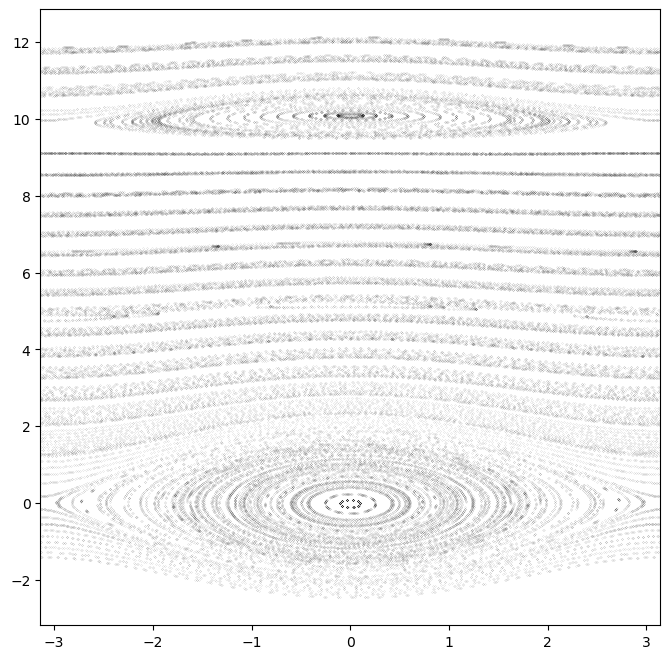

In [56]:
def pltpoints(eps1, eps2, r, nu):
    """Calculates ODE many times with different initial conditions."""

    nums = 102
    t = np.linspace(0,nums-1,nums)*2*np.pi/(r*nu)

    plt.rcParams["figure.figsize"] = (8,8)

    for ics in y0:
        sol = odeint(hamiltonian, ics, t, args=(eps1, eps2, r, nu))
        φcoords = np.subtract(np.mod(np.add(sol[:,0], np.pi),2*np.pi ),np.pi)
        plt.plot(φcoords, sol[:,1], 'k.',  ms=0.1)            # Transposes the data, giving list of phi, p coordinates to plot.

pltpoints(1, 0.1, 1, 10)
ax = plt.subplot()
ax.set_xlim([-np.pi, np.pi])